In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
raw_dataset = pd.read_csv("weather.csv", header=0, skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# 새 섹션

MSE: 11.15926
RMSE: 3.34055


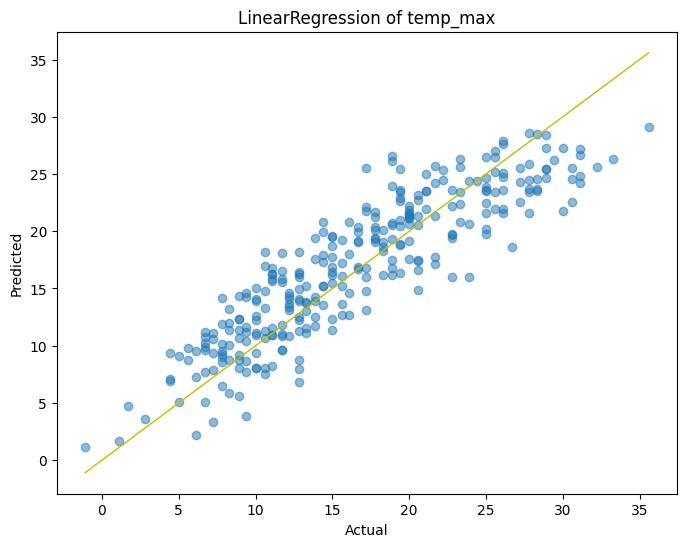

In [4]:
X = dataset[['precipitation', 'temp_min', 'wind']]
Y = dataset['temp_max']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'y-', lw=1)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LinearRegression of temp_max")
plt.show()


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
raw_dataset = pd.read_csv("weather.csv", header=0,  comment='\t', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Logistic Regression
Accuracy: 0.80887

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       168
           1       0.71      0.94      0.81       125

    accuracy                           0.81       293
   macro avg       0.82      0.83      0.81       293
weighted avg       0.84      0.81      0.81       293



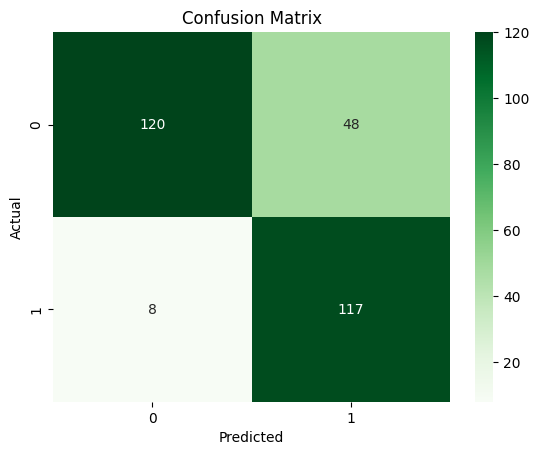

In [8]:
dataset['weather_Number'] = (dataset['weather'] == 'sun').astype(int)

X = dataset[['precipitation', 'temp_max', 'temp_min', 'wind']]
Y = dataset['weather_Number']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

print("Logistic Regression")
print(f"Accuracy: {acc:.5f}\n")

print("Classification Report:")
print(classification_report(Y_test, Y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
